## Test on a simple case
Consider the following Possion Equation
$$
\begin{cases}
    \Delta u = 1\qquad &u\in\Omega\\
    u = 0\qquad &u\in\partial\Omega.
\end{cases}$$
Here $\Omega = \{(x, y)|x^2+y^2 < 1\}$

The exact solution to this problem is $$u = \frac{1}{4}(x^2+y^2-1).$$

In [21]:
% matplotlib inline
import torch 
import torch.nn.functional as F
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

torch.set_default_tensor_type('torch.FloatTensor')

m = 10
learning_rate = 0.01
iterations = 10000 #default 10000
print_every_iter = 100
beta = 500 #coefficient for the regularization term in the loss expression, is set to be 1000 in section 3.1
n1 = 1000 #number of points in (0,1)^m
n2 = 100  #number of points on the border of (0,1)^m
n3 = 100  #number of points used for evaluating the error

class DeepRitzNet(torch.nn.Module):
    def __init__(self, m):
        super(DeepRitzNet, self).__init__()
        self.linear1 = torch.nn.Linear(m,m)
        self.linear2 = torch.nn.Linear(m,m)
        self.linear3 = torch.nn.Linear(m,m)
        self.linear4 = torch.nn.Linear(m,m)
        self.linear5 = torch.nn.Linear(m,m)
        self.linear6 = torch.nn.Linear(m,m)
        
        self.linear7 = torch.nn.Linear(m,1)
    
    def forward(self, x):
        y = x
        y = y + F.relu(self.linear2(F.relu(self.linear1(y))))
        y = y + F.relu(self.linear4(F.relu(self.linear3(y))))
        y = y + F.relu(self.linear6(F.relu(self.linear5(y))))
        output = F.relu(self.linear7(y))
        return output

In [18]:
def draw_graph():
    points = np.arange(-1, 1, 0.1)
    xs, ys = np.meshgrid(points, points)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    xl, yl = xs.size()
    z = np.zeros((xl, yl))
    mmm = 0
    for i in range(xl):
        for j in range(yl):      
            re = np.zeros(m)
            re[0] = xs[i, j]
            re[1] = ys[i, j]
            re = torch.tensor(re)        
            z[i, j] = model(re.float()).item() + U_groundtruth(re) ###jason写的加号，应该是减号吧？
            if re[0] ** 2 + re[1] ** 2 < 1 and abs(z[i, j]) > mmm:
                mmm = abs(z[i, j])
    
    plt.imshow(z, cmap=cm.hot)
    plt.colorbar()
    plt.show()
    print(mmm)

In [13]:
#U_groundtruth = 1/4*(x^2+y^2)-1/4
#take in a (m,) tensor (x, y, ...)
def U_groundtruth(t):
    #re = 0
    re = (t[0] ** 2 + t[1] ** 2 - 1).item() / 4
    return re

#turn a (2,) tensor/ndarray to a (m,) tensor
def zeropad(x_2, m):
    x_10 = torch.zeros(m, )
    x_10[0] = x_2[0]
    x_10[1] = x_2[1]
    return x_10
    
#sample a (m,) tensor on the border of the unit circle
def on_sample(m):
    theta = np.random.rand() * 2 * pi
    re = np.zeros(m)
    re[0] = cos(theta)
    re[1] = sin(theta)
    re = torch.tensor(re, requires_grad=True)
    return re

#sample a (m,) tensor in the unit circle
def in_sample(m):
    r = sqrt(np.random.rand())
    theta = np.random.rand() * 2 * pi
    re = np.zeros(m)
    re[0] = r * cos(theta)
    re[1] = r * sin(theta)
    re = torch.tensor(re, requires_grad=True)
    return re

0  epoch, loss:  -0.32424983
0  epoch, regularization loss:  0.24464637
1  epoch, loss:  -0.39586514
1  epoch, regularization loss:  0.27725014
2  epoch, loss:  -0.44450408
2  epoch, regularization loss:  0.29039285
3  epoch, loss:  -0.49025264
3  epoch, regularization loss:  0.3524344
4  epoch, loss:  -0.49510083
4  epoch, regularization loss:  0.30594575
5  epoch, loss:  -0.48956713
5  epoch, regularization loss:  0.27789453
6  epoch, loss:  -0.47023344
6  epoch, regularization loss:  0.25687662
7  epoch, loss:  -0.4535903
7  epoch, regularization loss:  0.23010708
8  epoch, loss:  -0.43662763
8  epoch, regularization loss:  0.21882023
9  epoch, loss:  -0.42405456
9  epoch, regularization loss:  0.19268164
10  epoch, loss:  -0.4165505
10  epoch, regularization loss:  0.18404144
11  epoch, loss:  -0.419382
11  epoch, regularization loss:  0.18439187
12  epoch, loss:  -0.4231191
12  epoch, regularization loss:  0.19722971
13  epoch, loss:  -0.43023628
13  epoch, regularization loss:  0

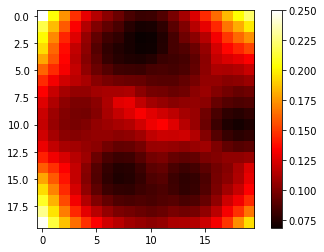

0.14724861860275262
100  epoch, loss:  -0.16572498
100  epoch, regularization loss:  0.058228187
101  epoch, loss:  -0.16936827
101  epoch, regularization loss:  0.059754685
102  epoch, loss:  -0.17072484
102  epoch, regularization loss:  0.059646145
103  epoch, loss:  -0.16253334
103  epoch, regularization loss:  0.06396476
104  epoch, loss:  -0.15300967
104  epoch, regularization loss:  0.053026997
105  epoch, loss:  -0.16843478
105  epoch, regularization loss:  0.06287295
106  epoch, loss:  -0.16500944
106  epoch, regularization loss:  0.05386093
107  epoch, loss:  -0.15533213
107  epoch, regularization loss:  0.048812084
108  epoch, loss:  -0.15678704
108  epoch, regularization loss:  0.05211522
109  epoch, loss:  -0.15104601
109  epoch, regularization loss:  0.05135999
110  epoch, loss:  -0.14574626
110  epoch, regularization loss:  0.042065065
111  epoch, loss:  -0.15928479
111  epoch, regularization loss:  0.050808888
112  epoch, loss:  -0.15538272
112  epoch, regularization los

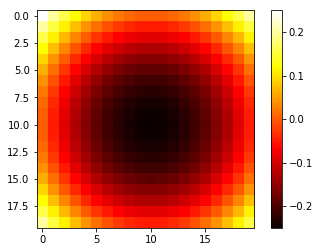

0.25
200  epoch, loss:  0.0
200  epoch, regularization loss:  0.0
201  epoch, loss:  0.0
201  epoch, regularization loss:  0.0
202  epoch, loss:  0.0
202  epoch, regularization loss:  0.0
203  epoch, loss:  0.0
203  epoch, regularization loss:  0.0
204  epoch, loss:  0.0
204  epoch, regularization loss:  0.0
205  epoch, loss:  0.0
205  epoch, regularization loss:  0.0
206  epoch, loss:  0.0
206  epoch, regularization loss:  0.0
207  epoch, loss:  0.0
207  epoch, regularization loss:  0.0
208  epoch, loss:  0.0
208  epoch, regularization loss:  0.0
209  epoch, loss:  0.0
209  epoch, regularization loss:  0.0
210  epoch, loss:  0.0
210  epoch, regularization loss:  0.0
211  epoch, loss:  0.0
211  epoch, regularization loss:  0.0
212  epoch, loss:  0.0
212  epoch, regularization loss:  0.0
213  epoch, loss:  0.0
213  epoch, regularization loss:  0.0
214  epoch, loss:  0.0
214  epoch, regularization loss:  0.0
215  epoch, loss:  0.0
215  epoch, regularization loss:  0.0
216  epoch, loss:  

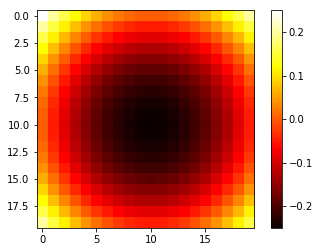

0.25
300  epoch, loss:  0.0
300  epoch, regularization loss:  0.0
301  epoch, loss:  0.0
301  epoch, regularization loss:  0.0
302  epoch, loss:  0.0
302  epoch, regularization loss:  0.0
303  epoch, loss:  0.0
303  epoch, regularization loss:  0.0
304  epoch, loss:  0.0
304  epoch, regularization loss:  0.0
305  epoch, loss:  0.0
305  epoch, regularization loss:  0.0
306  epoch, loss:  0.0
306  epoch, regularization loss:  0.0
307  epoch, loss:  0.0
307  epoch, regularization loss:  0.0
308  epoch, loss:  0.0
308  epoch, regularization loss:  0.0
309  epoch, loss:  0.0
309  epoch, regularization loss:  0.0
310  epoch, loss:  0.0
310  epoch, regularization loss:  0.0
311  epoch, loss:  0.0
311  epoch, regularization loss:  0.0
312  epoch, loss:  0.0
312  epoch, regularization loss:  0.0
313  epoch, loss:  0.0
313  epoch, regularization loss:  0.0
314  epoch, loss:  0.0
314  epoch, regularization loss:  0.0
315  epoch, loss:  0.0
315  epoch, regularization loss:  0.0
316  epoch, loss:  

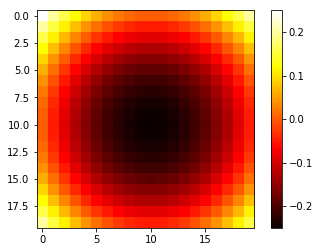

0.25
400  epoch, loss:  0.0
400  epoch, regularization loss:  0.0
401  epoch, loss:  0.0
401  epoch, regularization loss:  0.0
402  epoch, loss:  0.0
402  epoch, regularization loss:  0.0
403  epoch, loss:  0.0
403  epoch, regularization loss:  0.0
404  epoch, loss:  0.0
404  epoch, regularization loss:  0.0
405  epoch, loss:  0.0
405  epoch, regularization loss:  0.0
406  epoch, loss:  0.0
406  epoch, regularization loss:  0.0
407  epoch, loss:  0.0
407  epoch, regularization loss:  0.0
408  epoch, loss:  0.0
408  epoch, regularization loss:  0.0
409  epoch, loss:  0.0
409  epoch, regularization loss:  0.0
410  epoch, loss:  0.0
410  epoch, regularization loss:  0.0
411  epoch, loss:  0.0
411  epoch, regularization loss:  0.0
412  epoch, loss:  0.0
412  epoch, regularization loss:  0.0
413  epoch, loss:  0.0
413  epoch, regularization loss:  0.0
414  epoch, loss:  0.0
414  epoch, regularization loss:  0.0
415  epoch, loss:  0.0
415  epoch, regularization loss:  0.0
416  epoch, loss:  

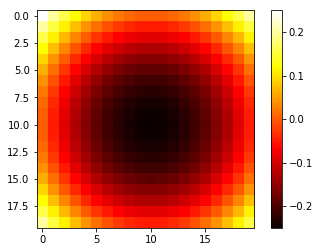

0.25
500  epoch, loss:  0.0
500  epoch, regularization loss:  0.0
501  epoch, loss:  0.0
501  epoch, regularization loss:  0.0
502  epoch, loss:  0.0
502  epoch, regularization loss:  0.0
503  epoch, loss:  0.0
503  epoch, regularization loss:  0.0
504  epoch, loss:  0.0
504  epoch, regularization loss:  0.0
505  epoch, loss:  0.0
505  epoch, regularization loss:  0.0
506  epoch, loss:  0.0
506  epoch, regularization loss:  0.0
507  epoch, loss:  0.0
507  epoch, regularization loss:  0.0
508  epoch, loss:  0.0
508  epoch, regularization loss:  0.0
509  epoch, loss:  0.0
509  epoch, regularization loss:  0.0
510  epoch, loss:  0.0
510  epoch, regularization loss:  0.0
511  epoch, loss:  0.0
511  epoch, regularization loss:  0.0
512  epoch, loss:  0.0
512  epoch, regularization loss:  0.0
513  epoch, loss:  0.0
513  epoch, regularization loss:  0.0
514  epoch, loss:  0.0
514  epoch, regularization loss:  0.0
515  epoch, loss:  0.0
515  epoch, regularization loss:  0.0
516  epoch, loss:  

KeyboardInterrupt: 

In [22]:
model = DeepRitzNet(m)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
in_error_iter = [] #record the error in Omega every print_every_iter=100 times
on_error_iter = [] #record the error on the border of Omega every print_every_iter=100 times

mm = 1
for i in range(iterations):
    #calculate the loss 
    loss = torch.zeros(1)
    for t in range(n1):
        #if I miss out the ".float()" there will be an error and I don't know why
        #It seems to have something to do with the usage of relu()**3 in DeepRitzNet
        x_input = in_sample(m)
        y = model(x_input.float())
        #there will be an error without "retain_graph=True" , I don't know why
        #y.backward(retain_graph = True)
        
        x1 = torch.zeros(m)
        x2 = torch.zeros(m)
        x1[0] = 0.0001
        x2[1] = 0.0001
        x_input_1 = x_input.float() + x1
        x_input_2 = x_input.float() + x2
        x_input_grad_1 = (model(x_input_1) - y) / 0.0001
        x_input_grad_2 = (model(x_input_2) - y) / 0.0001

        loss += 0.5 * ((x_input_grad_1) ** 2 + (x_input_grad_2) ** 2) - y #jason use -, why not +　？
        #loss += 0.5 * ((x_input.grad.float()[0]) ** 2 + (x_input.grad.float()[1]) ** 2) + y
    loss /= n1

    regularization = torch.zeros(1)
    for t in range(n2):
        x_input = on_sample(m).float()
        y = model(x_input)
        regularization += y**2 
    regularization *= mm / n2
    if mm < 500:
        mm = mm * 1.015
    
    #draw_graph()
    print(i, " epoch, loss: ", loss.data[0].numpy())
    print(i, " epoch, regularization loss: ", regularization.data[0].numpy())
    
    loss += regularization
    
    #and step the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1)%100 == 0:
        draw_graph()
        
print("Traning Completed.")

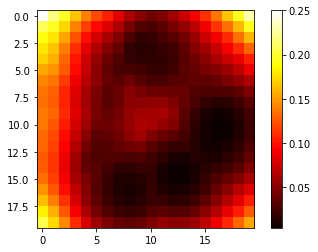

0.13650501549243932


In [19]:
draw_graph()
'''
Izuhseduognehsnadoaibiadegiyihsnaadeditneb
Izuhsdgnhsndoabadgiyhsnaddtnb
Izuhghsdogihstb
sdnnabadynaddn
'''

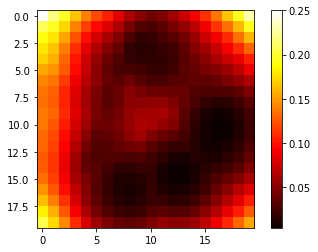

0.13650501549243932


In [20]:
draw_graph()

0.0767963904142
0.0767694622278
0.0816443055868
0.0800512599945
0.0727235519886
0.0703958141804
0.0665646582842
0.0614262133837
0.0612878131866
0.0622562801838
0.0654799461365
0.0725226056576
0.0778143239021
0.0802701622248
0.0814826673269
0.0749116152525
0.0647732001543
0.0596347999573
0.0594963848591
0.0643579548597
0.0731501206756
0.0644924592972
0.0577161699533
0.055939835906
0.0591635018587
0.0673871827126
0.0782208663225
0.0841537863016
0.0848201936483
0.0781201869249
0.0679818016291
0.0628433567286
0.0627049863338
0.0662760710716
0.0703864336014
0.0792926055193
0.0600868999958
0.0563997107744
0.0546233916283
0.0578470426798
0.0660707384348
0.0792944043875
0.0918068724871
0.0831532293558
0.0779921251535
0.0761903434992
0.0710519134998
0.0683757859468
0.0650434309244
0.0667110908031
0.0733787208796
0.0850463733077
0.0608704647422
0.0560235655308
0.0562792384624
0.0583069473505
0.0615306133032
0.0697543090582
0.0829779601097
0.0917631709576
0.0850538313389
0.0794770741463
0.0768732

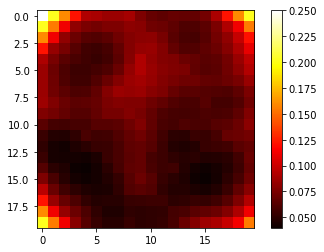

In [163]:
draw_graph()

In [143]:
x_input = on_sample(m).float()
y = model(x_input)
regularization = y**2
print(y)

tensor(1.00000e-02 *
       [ 6.9923])


In [84]:
model = DeepRitzNet(m)
model(torch.Tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

tensor(1.00000e-02 *
       [ 9.3990])

In [ ]:
#print the error
    if((i+1) % print_every_iter == 0):
        in_error = 0
        on_error = 0
        
        for t in range(n3):
            in_x_test = in_sample(m)
            in_error_instant = abs((model(in_x_test.float()) -
                                    U_groundtruth(in_x_test.float())).item())
            in_error = max(in_error, in_error_instant)
            
            on_x_test = on_sample(m)
            on_error_instant = abs((model(on_x_test.float()) -
                                    U_groundtruth(on_x_test.float())).item())
            on_error = max(on_error,on_error_instant)
            
        in_error_iter.append(in_error)
        on_error_iter.append(on_error)
        
        print("Error in Omega at the",i+1,"th iteration:",in_error)
        print("Error on the border of Omega at the",i+1,"th iteration:",on_error)

In [ ]:
for i in range(iterations):
    #calculate the loss 
    loss=torch.zeros(1)
    for t in range(n1):
        #if I miss out the ".float()" there will be an error and I don't know why
        #It seems to have something to do with the usage of relu()**3 in DeepRitzNet
        x_input=in_sample()
        y=model(x_input.float())
        #there will be an error without "retain_graph=True" , I don't know why
        y.backward(retain_graph=True)
        loss+=0.5*((x_input.grad.float()[0])**2+(x_input.grad.float()[1])**2)-y
    loss/=n1
    
    regularization=torch.zeros(1)
    for t in range(n2):
        x_input=on_sample().float()
        y=model(x_input)
        regularization+=y**2   
    regularization*=beta/n2
    
    loss+=regularization
    
    #and step the optimizer
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #print the error
    if((i+1)%print_every_iter==0):
        in_error=0
        on_error=0
        
        for t in range(n3):
            in_x_test=in_sample()
            in_error_instant=abs((model(in_x_test.float())-U_groundtruth(in_x_test.float())).item())
            in_error=max(in_error,in_error_instant)
            
            on_x_test=on_sample()
            on_error_instant=abs((model(on_x_test.float())-U_groundtruth(on_x_test.float())).item())
            on_error=max(on_error,on_error_instant)
            
        in_error_iter.append(in_error)
        on_error_iter.append(on_error)
        
        print("Loss at the",i+1,"th iteration:", loss)
        print("Error in Omega at the",i+1,"th iteration:",in_error)
        print("Error on the border of Omega at the",i+1,"th iteration:",on_error)
        
print("Traning Completed.")